<a href="https://colab.research.google.com/github/johnychaves/DataScienceFGV/blob/main/EconometriaAplicada/Trabalho_Final_Econometria_Aplicada_Joao_Chaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final - Econometria Aplicada
Aluno: João Pedro Brandão Quinderé Chaves

## O impacto das práticas ESG no resultado de empresas do S&P500

**Motivações**

*   Com a pauta de sustentabilidade aumentando nos últimos anos, muito se é questionando se esses fundamentos são realmente rentáveis, ou se são apenas de caráter ideológico.

*   Porter & Krame, através da sua publicação "O Ecossistema de Valor Compartilhado", trazem um conceito de que ser sustentável gera eficiência, economiza energia e atrai talentos. Logo, de forma resumida, que o ESG aumenta o lucro da empresa.

* Milton Friedman, por outro lado, traz a visão do Trade-Off, onde gastar dinheiro que não tenha a finalidade de aumentar o lucro diretamente, é apenas um aumento de custo. Indo na contramão, afirmando que ESG diminui o lucro de uma empresa.


* Damodaran, em diversas publicações e manifestações públicas, cita que o investimento ESG não possui a devida efetividade que prometem. Afirmando até que esse tipo de investimento é apenas um "golpe para se sentir bem", do que propriamente algo bom para a empresa.








### 01. Baixando pacotes e bibliotecas

In [19]:
install.packages("stargazer")
install.packages("corrplot")
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("car")
install.packages("sandwich")
install.packages("lmtest")
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(tidyverse)
library(stargazer)
library(corrplot)
library(ggrepel)
library(car)
library(sandwich)
library(lmtest)
library(tseries)

### 02. Baixando dados e primeiras análises

In [21]:
url_dados <- "https://raw.githubusercontent.com/johnychaves/DataScienceFGV/refs/heads/main/EconometriaAplicada/base_final_projeto.csv"

df <- read.csv(url_dados)

head(df)

,Symbol,Name,Address,Sector,Industry,Full.Time.Employees,Description,Total.ESG.Risk.score,Environment.Risk.Score,Governance.Risk.Score,Social.Risk.Score,Controversy.Level,Controversy.Score,ESG.Risk.Percentile,ESG.Risk.Level,ROE_Yahoo,Divida_PL_Yahoo,Beta_Yahoo,PB_Yahoo,Liquidez_Yahoo
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive Kingsport, TN 37662 United States",Basic Materials,Specialty Chemicals,"14,000","Eastman Chemical Company operates as a specialty materials company in the United States, China, and internationally. The company's Additives & Functional Products segment offers amine derivative-based building blocks, intermediates for surfactants, metam-based soil fumigants, and organic acid-based solutions; specialty coalescent and solvents, paint additives, and specialty polymers; and heat transfer and aviation fluids. It serves transportation, personal care, wellness, food, feed, agriculture, building and construction, water treatment, energy, consumables, durables, and electronics markets. Its Advanced Materials segment provides copolyesters, cellulosic biopolymers, cellulose esters, polyvinyl butyral sheets, and window and protective films for value-added end uses in the transportation, durables, electronics, building and construction, medical and pharma, and consumables markets. The company's Chemical Intermediates segment offers olefin and acetyl derivatives, ethylene, and commodity solvents; and primary non-phthalate and phthalate plasticizers, and niche non-phthalate plasticizers for industrial chemicals and processing, building and construction, health and wellness, and food and feed. Its Fibers segment provides cellulose acetate tow, triacetin, cellulose acetate flake, acetic acid, and acetic anhydride for use in filtration media primarily cigarette filters; natural and solution dyed acetate yarns, and staple fiber for use in consumables, and health and wellness markets; and wet-laid nonwoven media, specialty and engineered papers, and cellulose acetate fibers for transportation, industrial, agriculture and mining, and aerospace markets. The company was founded in 1920 and is headquartered in Kingsport, Tennessee.",25.3,12.8,6.6,5.8,Moderate Controversy Level,2,50th percentile,Medium,0.12116,89.235,1.253,1.176157,1.756
2,DVA,Davita Inc.,"2000 16th Street Denver, CO 80202 United States",Healthcare,Medical Care Facilities,"70,000","DaVita Inc. provides kidney dialysis services for patients suffering from chronic kidney failure in the United States. The company operates kidney dialysis centers and provides related lab services in outpatient dialysis centers. It also offers outpatient, hospital inpatient, and home-based hemodialysis services; operates clinical laboratories that provide routine laboratory tests for dialysis and other physician-prescribed laboratory tests for ESRD patients; and management and administrative services to outpatient dialysis centers. In addition, the company offers integrated care and disease management services to patients in risk-based and other integrated care arrangements; clinical research programs; physician services; and comprehensive kidney care services. Further, it engages in the provision of acute inpatient dialysis services and related laboratory services; and transplant software business. The company was formerly known as DaVita HealthCare Partners Inc. and changed its name to DaVita Inc. in September 2016. DaVita Inc. was incorporated in 1994 and is headquartered in Denver, Colorado.",22.6,0.1,8.4,14.1,Moderate Controversy Level,2,38th percentile,Medium,0.61618,953.093,0.994,-14.924910,1.363
3,DRI,"Darden Restaurants, Inc.","1000 Darden Center Drive Orlando, FL 32837 United States",Consumer Cyclical,Restaurants,"187,384","Darden Restaurants, Inc., together with its subsidiaries, owns and operates full-service restaurants in the United States and

In [22]:
df_limpo <- df %>%
  select(
    ticker = Symbol,
    setor = Sector,
    esg_score = Total.ESG.Risk.score,
    roe = ROE_Yahoo,
    divida_pl = Divida_PL_Yahoo,
    funcionarios_texto = Full.Time.Employees,
    beta = Beta_Yahoo,
    pb = PB_Yahoo,
    liquidez = Liquidez_Yahoo
  ) %>%

  mutate(
    funcionarios_limpo = str_remove_all(funcionarios_texto, ","),
    funcionarios_num = as.numeric(funcionarios_limpo),
    log_tamanho = log(funcionarios_num)
  ) %>%

  na.omit() %>%
  filter(roe < 2 & roe > -5)

glimpse(df_limpo)

Rows: 359
Columns: 12
$ ticker             <chr> "EMN", "DVA", "DRI", "ZTS", "ZBH", "XYL", "XEL", "W…
$ setor              <chr> "Basic Materials", "Healthcare", "Consumer Cyclical…
$ esg_score          <dbl> 25.3, 22.6, 27.5, 18.8, 26.0, 18.1, 26.5, 18.7, 21.…
$ roe                <dbl> 0.12116000, 0.61618000, 0.50411000, 0.49868000, 0.0…
$ divida_pl          <dbl> 89.235, 953.093, 361.727, 135.050, 64.523, 18.253, …
$ funcionarios_texto <chr> "14,000", "70,000", "187,384", "14,100", "18,000", …
$ beta               <dbl> 1.253, 0.994, 0.656, 0.962, 0.610, 1.168, 0.454, 0.…
$ pb                 <dbl> 1.176157, -14.924910, 9.138075, 9.982824, 1.432211,…
$ liquidez           <dbl> 1.756, 1.363, 0.397, 3.643, 2.428, 1.957, 0.795, 1.…
$ funcionarios_limpo <chr> "14000", "70000", "187384", "14100", "18000", "2300…
$ funcionarios_num   <dbl> 14000, 70000, 187384, 14100, 18000, 23000, 11311, 4…
$ log_tamanho        <dbl> 9.546813, 11.156251, 12.140915, 9.553930, 9.798127,…


#### **Descrição das variáveis:**

*   ESG_Score: Sendo a nossa variável de interesse no projeto, é nota do risco ESG, onde essa fornece um sinal de um risco não gerido pelas empresas, ou seja, quão exposto as empresas estão a falhas para fatores ESG.*
*   ROE: *Return on Equity*, Lucro sobre o Patrimônio Líquido de cada empresa - será nossa varíavel resposta.
*   Setor: Setor de atuação de cada empresa
*   Dívida/PL: Nível de endividamente da empresa, dado o seu patrimônio Líquido
*   Funcionários: Número de funcionários da empresa
*   Beta: Medida de risco sistemático de um ativo, ao comparar com a volatilidade do mercado.
*   Liquidez Corrente: Indicador de Liquidez da empresa, ao dividir os Ativos de Curto Prazo, pelos Passivos de Curto Prazo.
*   P/B: Price-To-Book, indicador utilizado para mensurar o quão "caro" está uma ação, utilizando o seu preço de mercado, e dividindo seu valor patrimonial por ação.





**Indicador calculado pela Morninstar Sustainalytics, mais informações no link:*  https://www.sustainalytics.com/docs/knowledgehublibraries/default-document-library/sustainalytics_-esg-risk-ratings_-version-3-1_-methodology-abstract_-june-2024.pdf

In [23]:
vars_numericas <- df_limpo %>%
  select(roe, esg_score, divida_pl, log_tamanho, beta, pb, liquidez)

stargazer(as.data.frame(vars_numericas),
          type = "text",
          title = "Estatísticas Descritivas",
          digits = 2,
          summary.stat = c("n", "mean", "sd", "min", "max"))


Estatísticas Descritivas
Statistic    N   Mean  St. Dev.  Min     Max   
-----------------------------------------------
roe         359  0.22    0.26   -0.63    1.85  
esg_score   359 21.50    6.85    7.10   41.70  
divida_pl   359 127.40  153.24   0.78  1,051.14
log_tamanho 359 10.07    1.39    5.09   14.56  
beta        359  0.93    0.41   -0.07    2.53  
pb          359  6.17    8.18   -14.92  61.54  
liquidez    359  1.53    1.24    0.04   12.74  
-----------------------------------------------


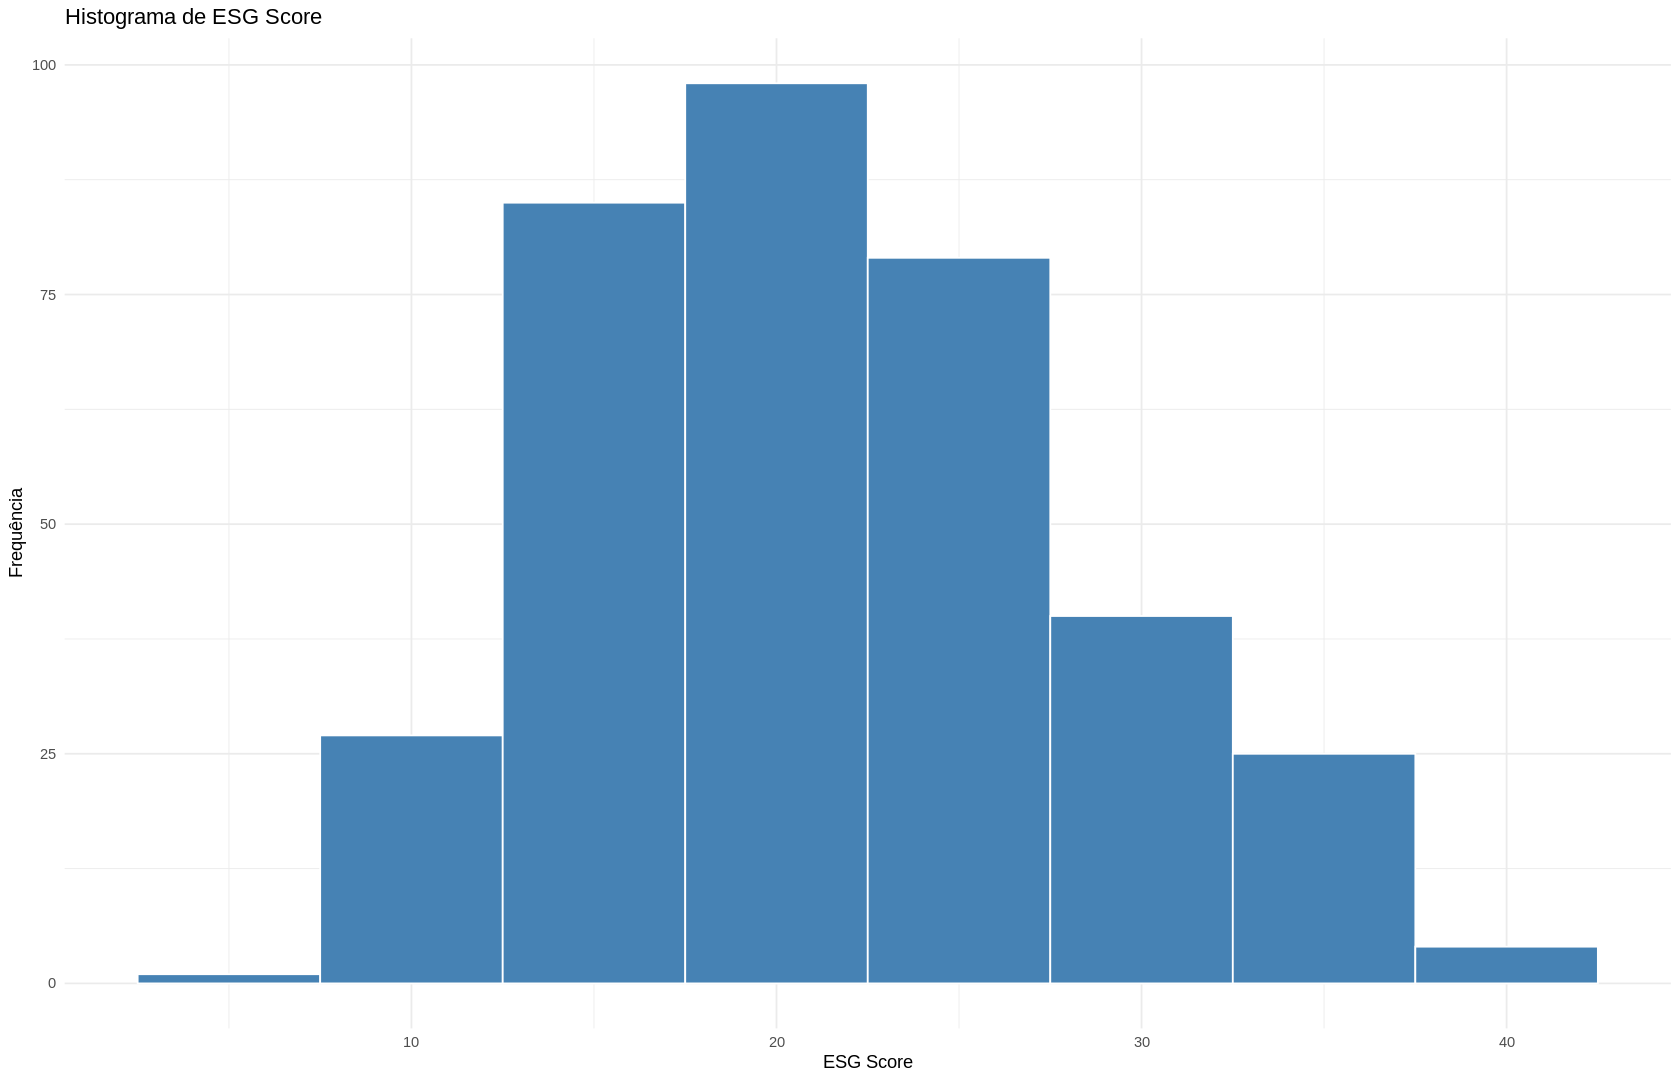

In [24]:
ggplot(df_limpo, aes(x = esg_score)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(title = "Histograma de ESG Score",
       x = "ESG Score",
       y = "Frequência") +
  theme_minimal()

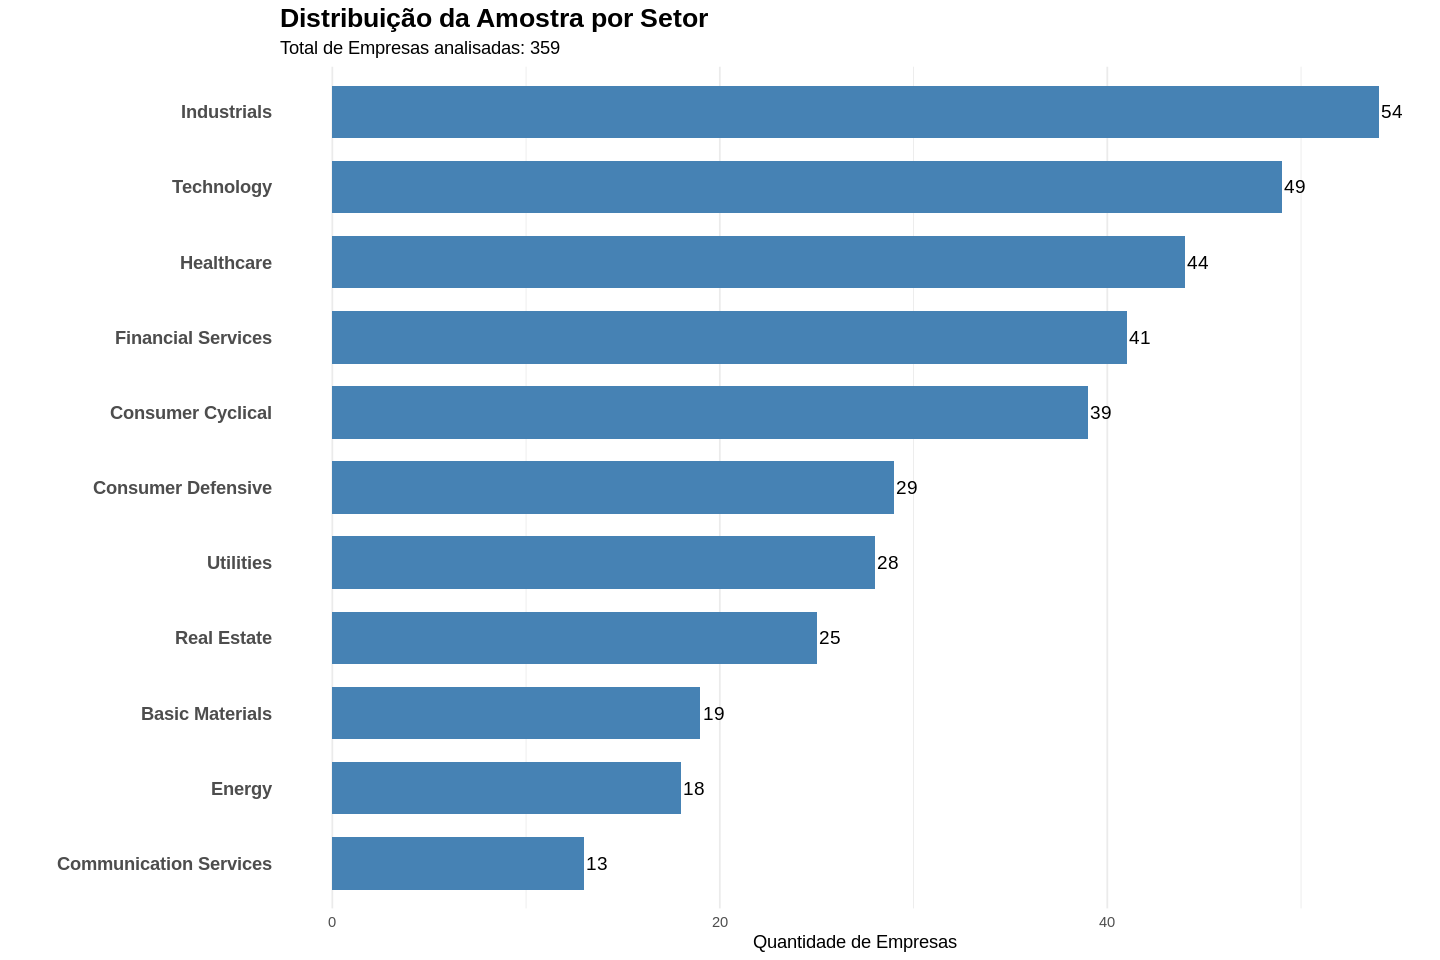

In [25]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(data = df_limpo, aes(y = fct_rev(fct_infreq(setor)))) +

  geom_bar(fill = "steelblue", width = 0.7) +

  geom_text(stat = "count", aes(label = after_stat(count)), hjust = -0.1, size = 4) +

  labs(
    title = "Distribuição da Amostra por Setor",
    subtitle = paste("Total de Empresas analisadas:", nrow(df_limpo)),
    x = "Quantidade de Empresas",
    y = ""
  ) +

  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),
    axis.text.y = element_text(size = 11, face = "bold"),
    panel.grid.major.y = element_blank()
  )



#### **Comentário**

Ao olharmos para os setores, vemos uma boa distribuição em cada segmento, podendo ser importante na hora de avaliarmos as regressões, uma vez que a dinâmica de cada setor pode ser impactante no ROE esperado.

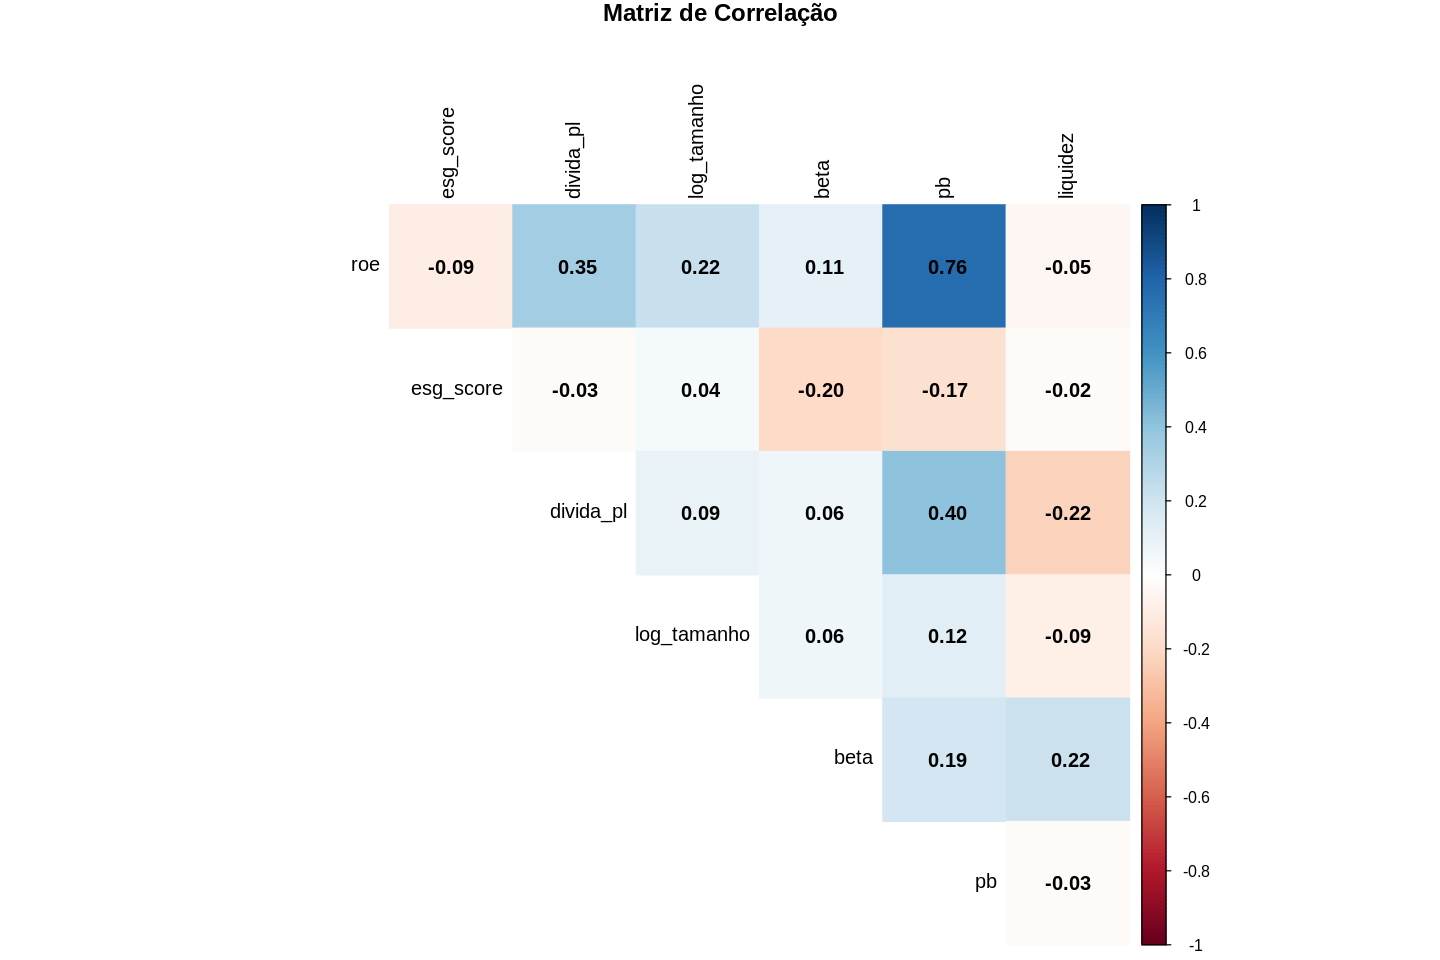

In [26]:
cor_matrix <- cor(vars_numericas)

corrplot(cor_matrix,
         method = "color",
         type = "upper",
         addCoef.col = "black",
         tl.col = "black",
         diag = FALSE,
         title = "Matriz de Correlação",
         mar = c(0,0,1,0))

#### **Comentário**

Única correlação mais impactante é do múltiplo P/B com o ROE, uma vez que sua composição traz o Patrimônio Líquido nos seus cálculos. No restante das relações, nada que entenda ser agravante para a construção do modelo.

Nota-se a relação negativa do ESG_Score com o ROE, conforme é esperado, uma vez que queremos provar que existe um impacto do ESG na rentabilidade das empresas. Nesse caso, por se tratar de um risco, a relação negativa entre elas.

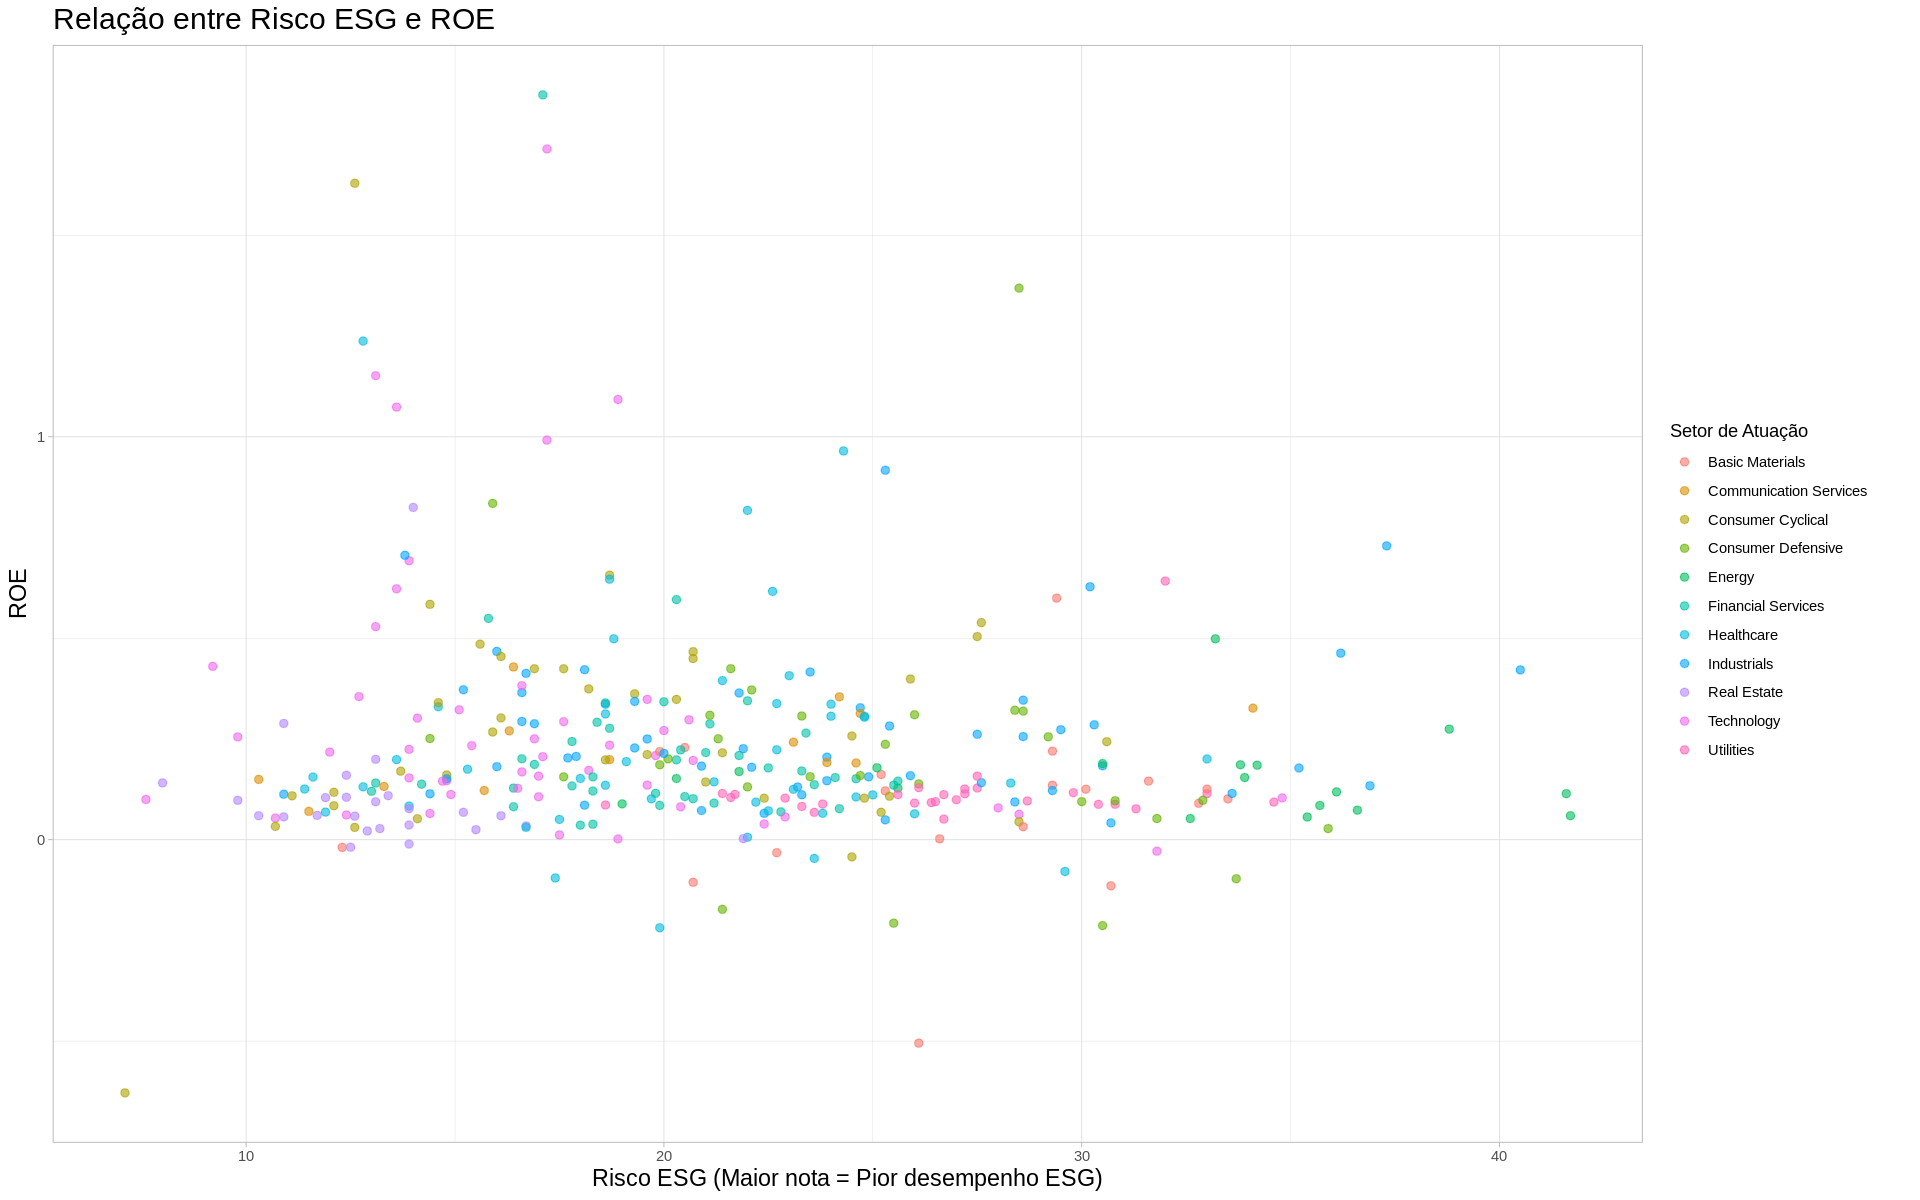

In [27]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(data = df_limpo, aes(x = esg_score, y = roe, color = setor)) +
  geom_point(size = 2, alpha = 0.6) +

  labs(
    title = "Relação entre Risco ESG e ROE",
    x = "Risco ESG (Maior nota = Pior desempenho ESG)",
    y = "ROE",
    color = "Setor de Atuação"

  ) +

  theme_light() +
  theme(
    strip.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 18)
  )

#### **Comentário**

Ao olharmos para a relação do ROE das empresas versus o Risco ESG, visualmente não parece existir uma tendência clara. Temos como expectativa um sinal negativo para essa relação, onde um menor Risco ESG, ocasiona em um aumento na rentabilidade da empresa (ROE).


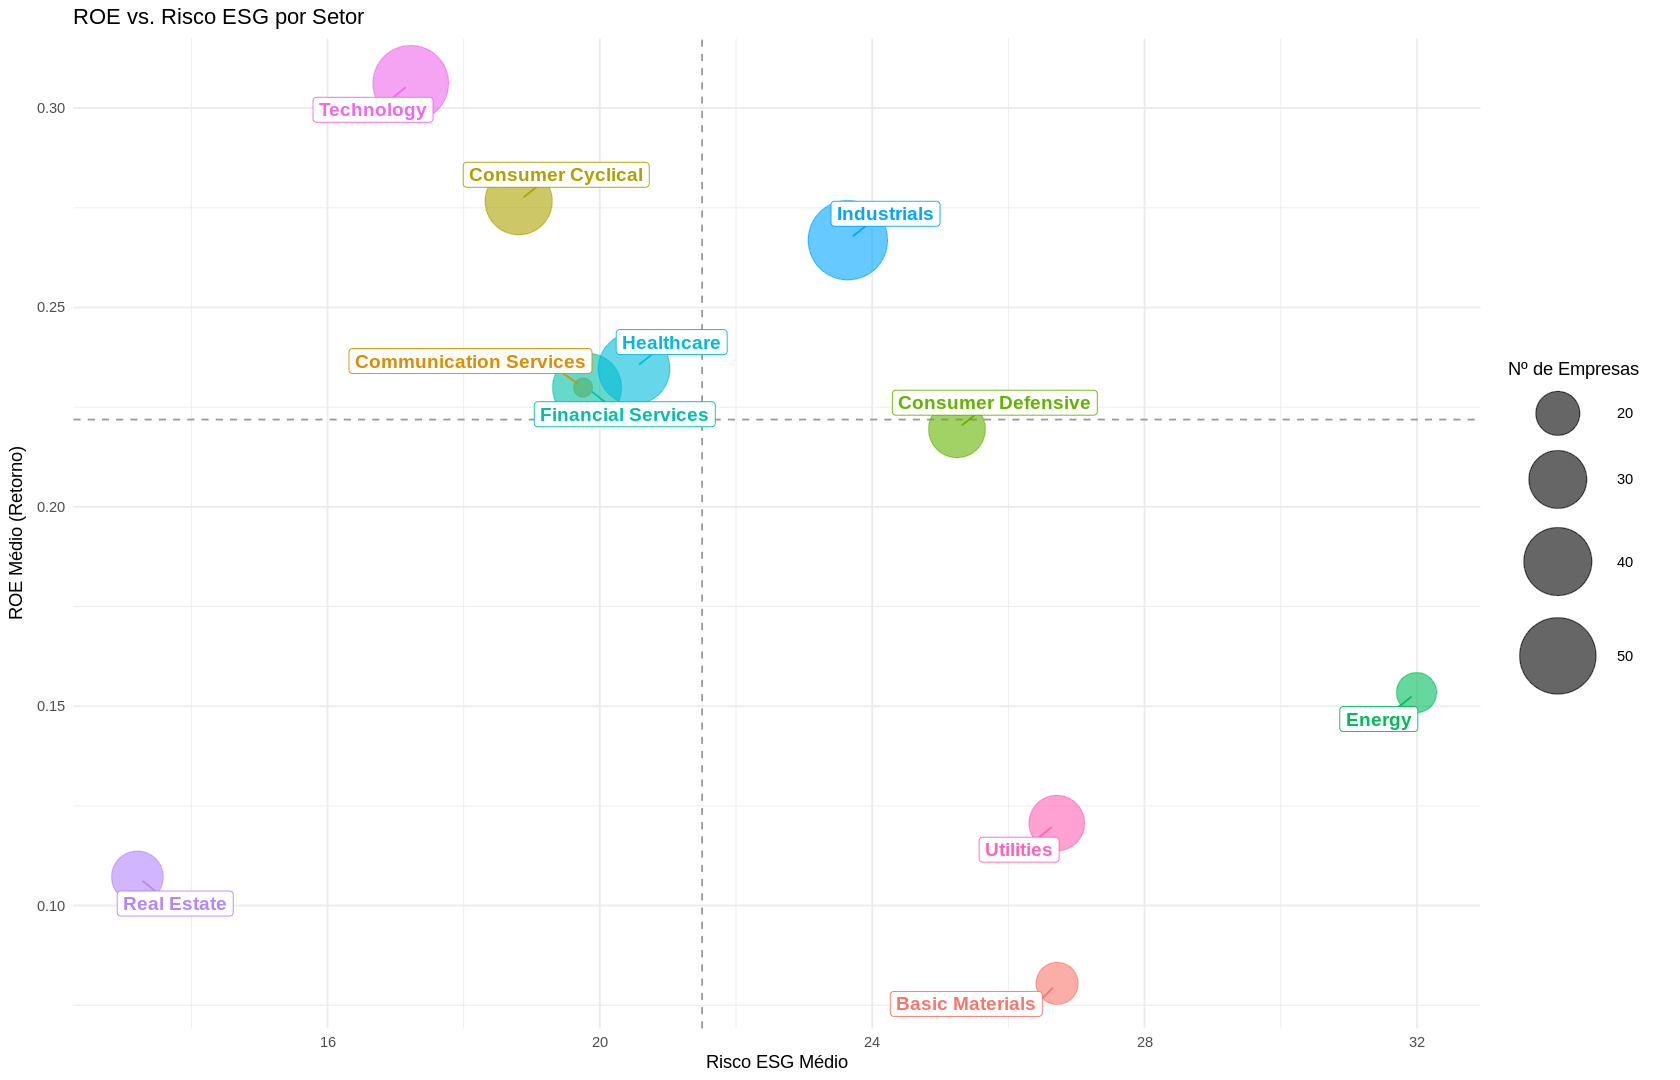

In [28]:

df_setores <- df_limpo %>%
  group_by(setor) %>%
  summarise(
    media_roe = mean(roe, na.rm = TRUE),
    media_esg = mean(esg_score, na.rm = TRUE),
    qtd_empresas = n()
  )

options(repr.plot.width = 14, repr.plot.height = 9)

ggplot(df_setores, aes(x = media_esg, y = media_roe, size = qtd_empresas, color = setor)) +

  geom_vline(xintercept = mean(df_limpo$esg_score), linetype = "dashed", color = "gray60") +
  geom_hline(yintercept = mean(df_limpo$roe), linetype = "dashed", color = "gray60") +

  geom_point(alpha = 0.6) +
  scale_size(range = c(5, 22), name = "Nº de Empresas") +

  geom_label_repel(
    aes(label = setor),
    size = 4,
    fontface = "bold",
    fill = "white",
    box.padding = 0.5,
    point.padding = 0.5,
    min.segment.length = 0,
    show.legend = FALSE
  ) +

  labs(
    title = "ROE vs. Risco ESG por Setor",
    x = "Risco ESG Médio",
    y = "ROE Médio (Retorno)"
  ) +
  theme_minimal() +
  guides(color = "none")

#### **Comentário**

Ao setorizarmos a relação do ESG médio vs o ROE médio, temos uma clareza das distorções que os setores podem acabar trazendo na análise.

Uma vez que empresas como de "Utilities", por exemplo, são empresas com menor rentabilidade e maior exposição a riscos ESG.

Por outro lado, empresas como de "Technology", apresenta uma dinâmica de rentabilidade muito mais elevada, e com baixa exposição a Risco ESG.

### 03. Regressões

#### **Pergunta a ser respondida**

A adoção de práticas ESG possui alguma influência na rentabilidade de uma empresa?

Modelo econômico:
$$
ROE_i = \beta_0 + \beta_1 ESG\_Risk_i + \beta_2 VariaveisControle_i
$$

Onde,

$$
\begin{cases}
H_0: \beta_1 = 0 & \text{(Hipótese Nula: Inexistência de Relação)} \\
H_1: \beta_1 \neq 0 & \text{(Hipótese Alternativa: Existência de Relação)}
\end{cases}
$$
<br>
Para isso, iremos estimar o seguinte modelo:
<br><br>
$$
ROE_i = \beta_0 + \beta_1 ESG\_Risk_i + \beta_2 \ln(Tam_i) + \beta_3 Div_i + \beta_4 Div^2_i + \beta_5 Beta_i + \beta_6 PB_i + \beta_7 Liq_i + \sum_{j=1}^{k} \delta_j Setor_{ji} + \varepsilon_i
$$


Onde:
* $ROE_i$: Retorno sobre o Patrimônio da empresa $i$.
* $ESG\_Risk_i$: Pontuação de Risco ESG (Variável de interesse).
* $\ln(Tam_i)$: Logaritmo natural do número de funcionários (Proxy de tamanho).
* $Div_i$: Alavancagem (Dívida Total / Patrimônio Líquido).
* $Div^2_i$: Termo quadrático para capturar a não-linearidade da dívida.
* $Beta_i$: Beta da ação (Risco de mercado).
* $PB_i$: Índice Preço/Valor Patrimonial (Proxy de crescimento/valuation).
* $Liq_i$: Liquidez Corrente.
* $Setor_{ji}$: Variáveis binárias (dummies) para controlar efeitos fixos de setor.
* $\varepsilon_i$: Termo de erro estocástico.

In [29]:
library(sandwich)
library(stargazer)
library(lmtest)


# Modelo 1:
mod_naive <- lm(roe ~ esg_score, data = df_limpo)

# Modelo 2:
mod_cap_struct <- lm(roe ~ esg_score +
                           divida_pl + I(divida_pl^2) +
                           liquidez,
                     data = df_limpo)

# Modelo 3:
mod_final <- lm(roe ~ esg_score +
                      divida_pl + I(divida_pl^2) +
                      liquidez +
                      log_tamanho + beta + pb + setor,
                data = df_limpo)

#Calculando erros robustos
se_naive <- sqrt(diag(vcovHC(mod_naive, type = "HC1")))
se_cap   <- sqrt(diag(vcovHC(mod_cap_struct, type = "HC1")))
se_final <- sqrt(diag(vcovHC(mod_final, type = "HC1")))



stargazer(mod_naive, mod_cap_struct, mod_final,
          type = "text",
          out = "Tabela_Final_Ajustada.html",

          title = "Determinantes do ROE: ESG vs Estrutura de Capital vs Valuation",
          column.labels = c("Ingênuo", "Estrutura Capital", "Completo"),

          covariate.labels = c("Risco ESG", "Dívida/PL", "Dívida²", "Liquidez",
                               "Tamanho (Log)", "Beta", "Price-to-Book"),

          omit = "setor",
          add.lines = list(c("Controle de Setor?", "Não", "Não", "Sim")),

          keep.stat = c("n", "adj.rsq", "f"),
          digits = 3,
          no.space = TRUE
)


Determinantes do ROE: ESG vs Estrutura de Capital vs Valuation
                                            Dependent variable:                         
                   ---------------------------------------------------------------------
                                                    roe                                 
                         Ingênuo           Estrutura Capital            Completo        
                           (1)                    (2)                     (3)           
----------------------------------------------------------------------------------------
Risco ESG                -0.004*                -0.003*                  0.002          
                         (0.002)                (0.002)                 (0.002)         
Dívida/PL                                      0.001***                 0.001***        
                                               (0.0002)                 (0.0002)        
Dívida²                                       

#### **Comentário**

Apenas para fins comparativos, estimei 3 regressões para tentar entender o impacto da inclusão das variáveis.



1a. Estimando o ROE através apenas do Risco ESG:

*   A variável de Risco ESG se comportou como esperado, tendo um coeficiente negativo, além de ser estatisticamente significativo.
*   O modelo é muito pobre, vendo que seu R2 ajustado não explica nem 1% da variação do ROE.


2a. Estimando o ROE através do Risco ESG e de Indicadores Financeiros (Dívida;Liquidez)


*   Modelo que já apresentou melhoras, com R2 de 15,4%
*   Variável ESG manteve-se a mesma, estatisticamente significativa e com coeficente negativo, mantendo-se coerente às expectativas.
*   Vale ressaltar que tanto a inclusão da dívida, quanto da dívida ao quadrado, se mostraram significativas, seguindo a teoria econômica.





3a. Estimando o modelo completo (incluindo Tamanho da empresa; Beta; P/B)



*   Modelo proposto agora apresentou melhoras significantes, aumentando o R2 para 61,3%

*   Além do múltiplo P/B, que esperávamos ser significativo, o tamanho da empresa (mensurada através do log de funcionários), se mostrou também estatisticamente significativo, com coeficiente positivo.

*   Com a adição dos controles (Tamanho da Empresa; Beta; P/B e utilizando Dummies de setor), notamos uma alteração brusca na variável de interesse ESG. Vemos que não só ela perdeu o coeficiente negativo, que se mostrava coerente com a expectativa, mas como também perdeu a sua significância. Podemos assumir que com a adição das variáveis de controle, retiramos efeitos de variáveis omitidas, que poderiam estar influenciando no resultado.









### 04. Análise dos Resíduos

In [33]:
# A) Normalidade
print("--- NORMALIDADE (Shapiro) ---")
print(shapiro.test(residuals(mod_final)))

# B) Heterocedasticidade
print("--- HETEROCEDASTICIDADE (Breusch-Pagan) ---")
print(bptest(mod_final))

# C) Autocorrelação
print("--- AUTOCORRELAÇÃO (Durbin-Watson) ---")
print(dwtest(mod_final))

# D) Multicolinearidade (VIF - Variance Inflation Factor)
print("--- MULTICOLINEARIDADE (VIF) ---")
vif_values <- vif(mod_final)
print(vif_values)

[1] "--- NORMALIDADE (Shapiro) ---"

	Shapiro-Wilk normality test

data:  residuals(mod_final)
W = 0.76477, p-value < 2.2e-16

[1] "--- HETEROCEDASTICIDADE (Breusch-Pagan) ---"

	studentized Breusch-Pagan test

data:  mod_final
BP = 131.38, df = 17, p-value < 2.2e-16

[1] "--- AUTOCORRELAÇÃO (Durbin-Watson) ---"

	Durbin-Watson test

data:  mod_final
DW = 2.0046, p-value = 0.4987
alternative hypothesis: true autocorrelation is greater than 0

[1] "--- MULTICOLINEARIDADE (VIF) ---"
                   GVIF Df GVIF^(1/(2*Df))
esg_score      1.741459  1        1.319644
divida_pl      9.250839  1        3.041519
I(divida_pl^2) 8.245390  1        2.871479
liquidez       1.323050  1        1.150239
log_tamanho    1.746694  1        1.321625
beta           1.572943  1        1.254170
pb             1.348749  1        1.161356
setor          5.674030 10        1.090673


Para tentar validar o modelo, fiz o diagnóstico dos resíduos para entender se podemos confiar no mesmo diante nos resultados que obtivemos. Para todos os testes, utilizamos 5% de significância.

1) Normalidade dos resíduos

Através do teste de Shapiro-Wilk, rejeitamos a hipótese nula de normalidade dos resíduos. Por mais que esse resultado seja desfavorável ao modelo, ainda podemos considera-lo válido devido ao Teorema do Limite Central (TLC), devido a grande amostra que utilizamos (N=338). Dessa forma, podemos confiar nos resultados apresentados pelos testes t e teste F.

2) Heterocedasticidade

Realizando o tesde de Breusch-Pagan, tivemos a rejeição da hipótese nula de homocedasticidade, consequentemente não podemos afirmar que a variânciad o erro é constante. Devido ao tipo de amostra que utilizamos (empresas do S&P 500), era de se esperar uma discrepância entre empresas que pudessem gerar esse tipo de resultado. Para validarmos o modelo, todos os resultados foram gerados utilizando Erros Padrão Robustos de White (HC1).

3) Autocorrelação

Para verificarmos se não existe autocorrelação nos erros, realizamos o teste de Durbin-Watson, que resultou na não rejeição da hipótese nula de existir autocorrelação nos resíduos.

4) Multicolinearidade

Na trativa de verificarmos se as variáveis eram realmente independentes, utilizamos o Fator de Inflação da Variância (VIF), cujos resultados confirmara a ausência de multicolinearidade, menos para a dívida e dívida^2, por se tratarem da mesma variável, porém isso pode ser considerado uma Multicolinearidade Estrutural, não afetando a qualidade do modelo.

### 05. Conclusões

Como conclusão deste estudo, chegamos à possuir evidências estatísticas para afirmar que o Risco ESG da empresa, ou seja, a aderência às práticas ESG, não possuem um impacto significativo no resultado das mesmas.

Uma possível continuação deste estudo, poderia ser o desmembramento destes resultados por setor. Podendo existir diferenças no tratamento destas práticas dependendo do setor que a empresa atua, talvez por aumento de produtividade e eficiência que estes métodos podem impactar na produção de algum bem ou serviço.